In [307]:
import pandas as pd
import numpy as np
import os
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier, LogisticRegressionCV, LassoCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score, roc_auc_score, balanced_accuracy_score, accuracy_score, make_scorer
from sklearn.dummy import DummyClassifier
from sklearn.feature_selection import SelectFromModel, RFECV
from xgboost import XGBClassifier, XGBRFClassifier
from catboost import CatBoostRegressor
import warnings
from yellowbrick.target import FeatureCorrelation
from yellowbrick.classifier import ClassBalance, ClassificationReport, ConfusionMatrix, DiscriminationThreshold
from yellowbrick.features import JointPlotVisualizer, PCADecomposition, RadViz, Rank1D, Rank2D
from datetime import datetime
from vecstack import stacking
from scipy import stats
import lightgbm
import datetime
from dateutil.parser import parse
import matplotlib.pyplot as plt
plt.rc("font", size=8)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", 
        color_codes=True, 
        font_scale = 2)
warnings.filterwarnings("ignore", category=FutureWarning)

In [74]:
os.chdir('/Users/patrickrs/Documents/GitLab/patrick-steiner/Exercises')

In [470]:
X = pd.read_csv("/Users/patrickrs/Documents/GitLab/patrick-steiner/Exercises/data/features_train.csv",
                  delimiter=',')

In [431]:
y = pd.read_csv("/Users/patrickrs/Documents/GitLab/patrick-steiner/Exercises/data/target_train.csv",
                  delimiter=',')

In [432]:
features_test = pd.read_csv("/Users/patrickrs/Documents/GitLab/patrick-steiner/Exercises/data/features_test.csv",
                  delimiter=',')

In [433]:
hold = 0.8

In [434]:
y['Id'].is_unique

True

In [435]:
X['Id'].is_unique

True

In [436]:
t = pd.testing.assert_series_equal(y['Id'], X['Id'], 
                               check_exact = True)

In [42]:
print(t) # id is equal

None


In [437]:
y.set_index('Id', inplace = True)

In [471]:
X.set_index('Id', inplace = True) # setting id column to row index 

In [439]:
# Specify the design matrix and the target vector for yellowbrick as arrays
design_matrix = X.values
target_vector = y.values.flatten()

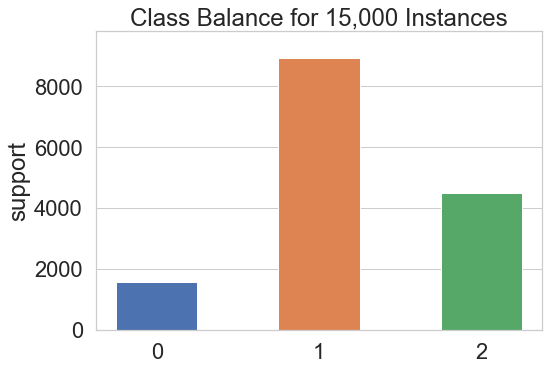

In [57]:
# Target balance
target_balance = ClassBalance()
target_balance.fit(target_vector)
target_balance.show();

In [54]:
# Stage 1. Feature Analysers
feature_names = X.columns.tolist()
target_name = y.columns.tolist()

In [263]:
# Stratified sampling based on the distribution of the target vector, y
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y,
                                                    test_size = hold, 
                                                    random_state = 42)

In [264]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,114,115,116,117,118,119,120,121,122,123
Id,,,,,,,,,,,,,,,,,,,,,
3982,0.180707,13.860578,2.451422,0.353772,0.886003,17.443035,10.581182,1.779755,1.038802,-0.324170,...,-3.238909,0.098863,-0.154490,0.470941,0.594235,0.873081,-0.817085,2.184454,-17.650350,0.624456
1895,0.275142,11.034567,7.521251,0.715449,0.349159,13.475279,0.819599,26.839121,1.443689,0.106369,...,-3.160292,0.572277,1.812179,0.962114,0.252659,0.339552,-0.016501,0.226893,-12.807715,1.148325
8915,0.549282,-1.276567,148.413159,3.994075,51.226353,-10.811248,0.052223,11.762378,1.859458,0.081669,...,0.597944,0.042527,-2.125339,0.284711,0.926713,0.559564,0.410932,3.442436,-32.705288,0.460927
1405,1.043984,-14.502738,0.036721,1.436222,0.358993,0.698210,0.034743,2.544090,0.810490,0.829054,...,8.435414,0.597823,-4.754348,0.169153,0.460460,0.441396,0.030800,0.064512,62.451040,1.505319
12803,0.122752,-3.102847,21.287322,5.005429,4.169104,19.286130,0.094778,83.922588,0.296447,1.671339,...,2.908825,0.797616,-1.774726,0.692584,0.261350,0.091793,0.683655,0.175462,-18.863817,3.817034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12745,2.766737,10.185093,0.017479,0.794991,94.683345,-2.399300,0.131075,16.458698,1.706326,0.441848,...,-14.093409,0.636225,2.947780,0.054799,0.059030,0.184451,0.116437,0.420765,4.133056,0.381908
10896,0.281010,-1.674848,28.916122,2.686636,1.753148,4.871004,7.021045,0.897034,0.738456,0.605036,...,12.973311,0.951498,2.798897,0.071914,0.992018,0.192970,-0.491112,0.108704,0.544562,0.268832
4258,2.364652,-2.485198,1.331461,1.106829,25.112227,-8.937254,0.103513,0.218064,0.075920,0.472329,...,-5.698919,0.941237,0.318342,0.681387,0.343250,0.168762,-1.183548,0.065195,4.436285,0.212292


In [150]:
scaler = StandardScaler()

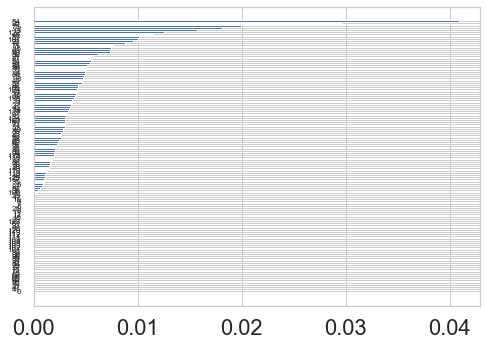

In [423]:
# Feature correlation (** requires dataframe and 1D target vector)
feature_correlation = FeatureCorrelation(method='mutual_info-regression',
                                         feature_names=feature_names, sort=True)
feature_correlation.fit(X, y.values.flatten())
for tick in feature_correlation.ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(8)

In [462]:
coef = np.empty(shape=0)
for col in X_train.columns:
    coef_temp = stats.spearmanr(X_train[col], y_train)[0]
    coef = np.append(coef, coef_temp)

In [463]:
coef2 = np.transpose(pd.DataFrame(coef))

In [465]:
coef > 0.005

array([False, False,  True, False,  True, False,  True, False, False,
       False,  True, False, False, False, False,  True, False,  True,
        True, False,  True,  True, False,  True, False,  True,  True,
       False,  True,  True,  True, False, False, False, False,  True,
       False,  True, False,  True,  True,  True,  True, False, False,
        True, False,  True, False,  True,  True,  True, False,  True,
        True, False, False, False,  True, False,  True, False, False,
       False, False, False,  True, False,  True, False, False, False,
        True, False,  True,  True,  True,  True, False, False,  True,
       False,  True, False, False, False,  True, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
        True,  True, False, False, False, False, False,  True,  True,
       False,  True, False,  True, False, False, False,  True, False,
       False,  True,  True,  True, False, False, False])

In [473]:
# Creating new dataset based on relevant criteria
X = X.iloc[:,coef > 0.005]

In [494]:
X

,2,4,6,10,15,17,18,20,21,23,...,99,100,106,107,109,111,115,118,119,120
Id,,,,,,,,,,,,,,,,,,,,,
0,148.413159,0.190717,0.264097,1.126690,5.687097,0.590683,1.608129,2.135188,2.587899,1.287846,...,-11.484015,0.327268,0.746830,2.715764,0.433957,15.644800,0.300928,0.523759,0.116409,0.675754
1,0.315937,0.034839,3.333765,1.437417,0.535058,1.413891,0.812193,0.001273,-1.058138,-10.125955,...,5.796931,1.119538,0.000042,0.302132,0.507016,6.708189,0.656999,0.467810,0.807791,-0.075898
2,0.496923,0.072552,0.262037,0.528841,0.245137,3.753676,1.963600,0.415272,-6.633085,-8.577446,...,-3.692298,-1.023107,1.136533,6.483880,0.526322,0.278572,0.983519,0.579664,0.848760,0.257566
3,0.702203,0.793226,0.408070,0.163829,1.703912,1.037918,3.861114,0.198823,3.149842,-15.623060,...,4.408993,-1.127588,0.068051,6.760588,1.417828,13.760439,0.986737,0.311443,0.683373,0.885297
4,0.082204,0.028962,0.029112,4.061469,2.032695,4.842173,0.329353,2.058480,-2.112569,2.064480,...,2.384292,0.280377,2.111570,15.562260,0.759110,-3.522123,0.013075,0.279407,0.724725,-0.143733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0.019463,0.247781,0.315856,0.133033,1.447482,0.520829,8.298502,0.309680,-8.763649,-7.177789,...,9.088116,-3.009512,0.213516,148.413159,0.476770,6.293622,0.256940,0.314656,0.291879,0.526458
14996,0.141034,1.108698,0.000705,0.716066,0.367137,3.519931,3.188724,1.811610,3.313875,-20.042600,...,15.919582,1.255454,1.472403,0.752627,0.192095,-12.529649,0.239398,0.541327,0.859865,-0.911313
14997,0.028428,1.325211,0.093595,0.195538,0.553549,1.411226,2.482349,0.046506,-3.025350,-4.855800,...,-7.981502,0.535072,0.622570,148.413159,2.157022,16.626650,0.879984,0.788489,0.542500,-0.134208


In [505]:
# Stratified sampling based on the distribution of the target vector, y
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y,
                                                    test_size = 0.5, 
                                                    random_state = 42)

In [476]:
# Specify the design matrix and the target vector for yellowbrick as arrays
design_matrix = X.values
feature_names = X.columns.tolist()

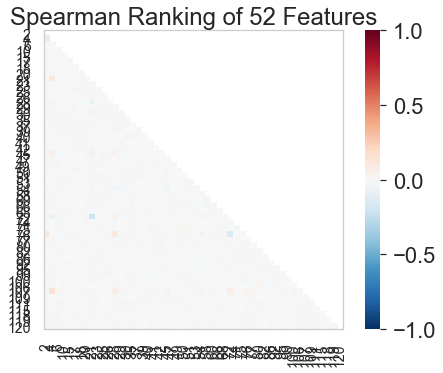

In [477]:
rank_2d = Rank2D(algorithm='spearman', features=feature_names)
for tick in rank_2d.ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in rank_2d.ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
rank_2d.fit_transform_show(design_matrix, target_vector);

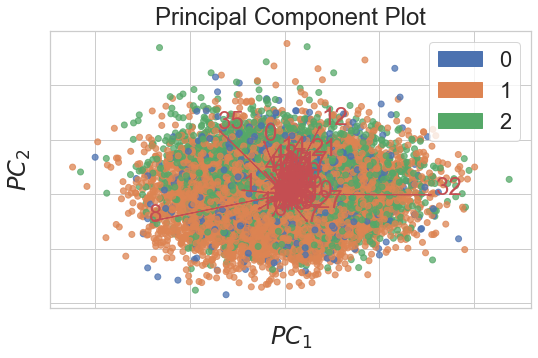

In [478]:
# PCA Projection
pca = PCADecomposition(scale=True, proj_features=True)
pca.fit_transform_show(design_matrix, target_vector);
# This is proving challenging

In [496]:
# 
clf = XGBRFClassifier(n_estimators = 450,
                      learning_rate=1, 
                      subsample=0.8, 
                      colsample_bynode=0.8, 
                      reg_lambda = 1,
                      reg_alpha = 1,
                      seed = 42,
                      n_jobs=-1
                     )

In [509]:
xgrf = clf.fit(X_train, 
               np.ravel(y_train), 
               eval_set = [(X_train, np.ravel(y_train)), (X_test, np.ravel(y_test))],
               eval_metric = 'mlogloss',
               verbose = True
              )

[0]	validation_0-mlogloss:0.837808	validation_1-mlogloss:0.855454


In [516]:
evals_result = xgrf.evals_result()

In [518]:
features_test.set_index('Id', inplace = True)

In [519]:
features_test = features_test.iloc[:,coef > 0.005]

In [551]:
pred = xgrf.predict(features_test)

In [552]:
pred = pd.DataFrame(pred)

In [553]:
pred['Predicted'] = pred

In [554]:
pred['Id'] = pred.index

In [555]:
pred = pred[['Id', 'Predicted']]

In [556]:
pred

,Id,Predicted
0,0,1
1,1,2
2,2,1
3,3,1
4,4,1
...,...,...
19995,19995,1
19996,19996,1
19997,19997,1
19998,19998,1


In [557]:
pred.to_csv('PREDICTIONS_XGBRFC.csv',index = False)

In [481]:
# Set a minimum threshold of 0.25
sfm = SelectFromModel(clf, 
                      threshold=0.01
                     )
sfm.fit(X, np.ravel(y))
n_features = sfm.transform(X).shape[1]
n_features

9

In [156]:
F_measure_scorer = make_scorer(f1_score)

In [333]:
xg=XGBClassifier(max_depth=3,
                 #learning_rate=0.05,
                 n_estimators=350,
                 objective="binary:logistic",
                 booster="gbtree",
                 gamma=0,
                 min_child_weight=0.8,
                 subsample=0.5,
                 #colsample_bylevel=1,
                 #colsample_bytree=0.6,
                 #reg_alpha=0.001,
                 #reg_lambda=1,
                 scale_pos_weight=22,
                 #random_state=42,
                 n_jobs=-1,
                 average = 'macro')
pipe=Pipeline(steps=[('pre',scaler),
                    ('clf',xg)])

In [334]:
params = [
    {
        'clf': [XGBClassifier()],   
        'clf__booster': ['gbtree'],
        'clf__learning_rate': stats.uniform(1, 3),
        'clf__min_split_loss': stats.uniform(60, 80),
        'clf__reg_alpha': stats.uniform(1, 100),
        'clf__reg_lambda': stats.uniform(1, 100),             
        'clf__sampling_method': ['uniform'],
        'clf__colsample_bytree': [0.3],
        'clf__colsample_bylevel': [0.5],
        'clf__colsample_bynode': [1],
        'clf__random_state': [42],
    }
]

In [335]:
n_iter_search = 20
rg_cv = RandomizedSearchCV(pipe, 
                           param_distributions = params,
                           n_iter = n_iter_search,
                           scoring = 'f1_macro',
                           random_state = 42
                           )

In [ ]:
search.best_score_

In [ ]:
search.best_params_

In [266]:
# Set a minimum threshold of 0.1
sfm = SelectFromModel(search, 
                      threshold=0.1
                     )
sfm.fit(X, np.ravel(y))
n_features = sfm.transform(X).shape[1]
n_features

KeyboardInterrupt: 

In [ ]:
# Reset the threshold till the number of features equals two.
# Note that the attribute can be set directly instead of repeatedly
# fitting the metatransformer.
while n_features > 20:
    sfm.threshold += 0.001
    X_transform = sfm.transform(X)
    n_features = X_transform.shape[1]

In [297]:
np.sort(search.best_estimator_.named_steps["clf"].feature_importances_)

/opt/anaconda3/envs/propulsion/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan], dtype=float32)

In [285]:
X_train.iloc[:,search.best_estimator_.named_steps["clf"].feature_importances_>0]

,2,11,28,29,54
Id,,,,,
3982,2.451422,309.672979,-6.723958,0.541066,3.671838
1895,7.521251,0.015404,3.112935,-0.607612,1.210595
8915,148.413159,40.559432,-1.349590,-0.923732,-1.614819
1405,0.036721,4.221183,1.324931,0.193840,1.550012
12803,21.287322,19.280481,2.243930,-0.045880,-4.244331
...,...,...,...,...,...
12745,0.017479,313.258722,-4.418542,0.673443,-0.076263
10896,28.916122,0.037396,-1.432404,0.919020,-0.422149
4258,1.331461,45.528992,4.989905,-1.111929,-4.209955


In [286]:
X.columns[search.best_estimator_.named_steps["clf"].feature_importances_>0]

Index(['2', '11', '28', '29', '54'], dtype='object')

In [ ]:
#rg_cv = GridSearchCV(pipe, param_grid, cv=5, scoring = 'f1_macro')

In [277]:
# Use SelectFromModel
thresholds = np.sort(search.best_estimator_.named_steps["clf"].feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(search, threshold=thresh, prefit=True)
    print(selection)

SelectFromModel(estimator=RandomizedSearchCV(cv=None, error_score=nan,
                                             estimator=Pipeline(memory=None,
                                                                steps=[('pre',
                                                                        StandardScaler(copy=True,
                                                                                       with_mean=True,
                                                                                       with_std=True)),
                                                                       ('clf',
                                                                        XGBClassifier(average='macro',
                                                                                      base_score=0.5,
                                                                                      booster='gbtree',
                                                                                

In [275]:
select_X_train = selection.transform(X_train)

ValueError: The underlying estimator RandomizedSearchCV has no `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to SelectFromModel or call fit before calling transform.

In [246]:
# train model
selection_model = rg_cv
selection_model.fit(select_X_train, y_train)

NameError: name 'select_X_train' is not defined

In [247]:
# eval model
select_X_test = selection.transform(X_test)
y_pred = selection_model.predict(select_X_test)
predictions = [round(value) for value in y_pred]
accuracy = f1_score(y_test, predictions)
print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy * 100.0))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

ValueError: non-broadcastable output operand with shape (4500,1) doesn't match the broadcast shape (4500,124)

In [337]:
logit = LogisticRegressionCV(Cs=10, 
                             fit_intercept=True, 
                             cv=5, 
                             dual=False, 
                             #penalty='l2', 
                             scoring='f1_macro', 
                             solver='saga', 
                             tol=0.0001, 
                             max_iter=100, 
                             class_weight='balanced', 
                             n_jobs = -1, 
                             verbose=0, 
                             refit=True, 
                             intercept_scaling=1.0, 
                             multi_class = 'multinomial', 
                             random_state = 42, 
                             l1_ratios = None)

In [343]:
params = [
    {
        'clf': [LogisticRegressionCV()],   
        'clf__Cs': np.linspace(1 ,100 ,10,endpoint=True),
        'clf__penalty': ['l1', 'l2'],
        'clf__solver': ['saga']
    }
        ]

In [344]:
pipe=Pipeline(steps=[('pre',scaler),
                    ('clf', logit)])

In [345]:
n_iter_search = 20
rg_cv = GridSearchCV(pipe, 
                     params, 
                     cv=5, 
                     scoring = 'f1_macro')

In [346]:
search = rg_cv.fit(X_train, np.ravel(y_train))

/opt/anaconda3/envs/propulsion/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: object of type 'numpy.float64' has no len()

  FitFailedWarning)
/opt/anaconda3/envs/propulsion/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: object of type 'numpy.float64' has no len()

  FitFailedWarning)
/opt/anaconda3/envs/propulsion/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: object of type 'numpy.float64' has no len()

  FitFailedWarning)
/opt/anaconda3/envs/propulsion/lib/python3.7/site-packages/sklearn/model_

TypeError: object of type 'numpy.float64' has no len()

In [347]:
search.best_score_

0.2487810943645657

In [309]:
class PipelineRFE(Pipeline):

    def fit(self, X, y=None, **fit_params):
        super(PipelineRFE, self).fit(X, y, **fit_params)
        self.feature_importances_ = self.steps[-1][-1].feature_importances_
        return self

pipe = PipelineRFE(
    [
        ('std_scaler', StandardScaler()),
        ("logit", logit)
    ]
)

# Sets RNG seed to reproduce results (your results should match mine)
_ = StratifiedKFold(random_state=42)

feature_selector_cv = RFECV(pipe, cv=10, step=1, scoring="f1_macro")
feature_selector_cv.fit(X_train, y_train)

/opt/anaconda3/envs/propulsion/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AttributeError: 'LogisticRegressionCV' object has no attribute 'feature_importances_'